In [119]:
%run Import.ipynb

# Introduction

This report uses logistic regression to determine the log odds relationship between the presence of government responses to covid-19 and the presence of cases of the virus.

Import dataset.

In [121]:
df=Json('df1: government responses to covid19')
df.excel('Gov_Responses2Covid19_last.xlsx', 'Dataset')
df1=json_storage['df1: government responses to covid19'][1]
df1

,country,geoid,iso,d,cases,deaths,school,school_local,domestic,domestic_local,...,wage,credit,taxc,taxd,export,rate,Rigidity_Public_Health,Economic_Measures,population_2019,continent
0,Aruba,AW,ABW,2020-01-01 00:00:00,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,106310.0,America
1,Aruba,AW,ABW,2020-01-02 00:00:00,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,106310.0,America
2,Aruba,AW,ABW,2020-01-03 00:00:00,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,106310.0,America
3,Aruba,AW,ABW,2020-01-04 00:00:00,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,106310.0,America
4,Aruba,AW,ABW,2020-01-05 00:00:00,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,106310.0,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62695,Hong Kong,HK,HKG,2020-09-29 00:00:00,NaN,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.461539,0.714286,NaN,NaN
62696,Hong Kong,HK,HKG,2020-09-30 00:00:00,NaN,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.461539,0.714286,NaN,NaN
62697,Macau,MO,MAC,2020-09-30 00:00:00,NaN,NaN,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.250000,0.714286,NaN,NaN
62698,Hong Kong,HK,HKG,2020-10-01 00:00:00,NaN,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.461539,0.714286,NaN,NaN


# Data Mining

In [123]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62700 entries, 0 to 62699
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 62700 non-null  object 
 1   geoid                   62425 non-null  object 
 2   iso                     62700 non-null  object 
 3   d                       62700 non-null  object 
 4   cases                   57750 non-null  float64
 5   deaths                  57750 non-null  float64
 6   school                  45758 non-null  float64
 7   school_local            45758 non-null  float64
 8   domestic                55275 non-null  float64
 9   domestic_local          55275 non-null  float64
 10  travel                  55275 non-null  float64
 11  travel_partial          55275 non-null  float64
 12  travel_dom              55275 non-null  float64
 13  travel_dom_partial      55275 non-null  float64
 14  curf                    55275 non-null

# Data Cleaning

Cleans government responses to covid 19 dataframe by replacing undesired values with desired ones, and droping undesired columns.

In [125]:
df1=df1.replace(np.nan, 0)
df1=df1.drop('geoid', axis=1)
df1=df1.drop('iso', axis=1)
df1=df1.drop('country', axis=1)
df1=df1.drop('continent', axis=1)
df1=df1.drop('d', axis=1)
df1=df1.drop('deaths', axis=1)
df1=df1.drop('population_2019', axis=1)
df1=df1.drop('school_local', axis=1)
df1=df1.drop('domestic_local', axis=1)
df1=df1.drop('travel_partial', axis=1)
df1=df1.drop('travel_dom_partial', axis=1)
df1=df1.drop('curf_partial', axis=1)
df1=df1.drop('mass_partial', axis=1)
df1=df1.drop('elect_partial', axis=1)
df1=df1.drop('sport_partial', axis=1)
df1=df1.drop('rest_local', axis=1)
df1=df1.drop('testing_narrow', axis=1)
df1=df1.drop('masks_partial', axis=1)
df1=df1.drop('surveillance_partial', axis=1)
df1=df1.drop('state_partial', axis=1)
df1=df1.drop('Rigidity_Public_Health', axis=1)
df1=df1.drop('Economic_Measures', axis=1)
df1

,cases,school,domestic,travel,travel_dom,curf,mass,elect,sport,rest,...,masks,surveillance,state,cash,wage,credit,taxc,taxd,export,rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62695,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
62696,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
62697,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
62698,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


The model will be determining whether cases of the virus were present.  Makes all values where cases were above 0 into 1. 

In [127]:
df1['cases']=df1['cases'][df1['cases'] > 0] = 1

# Data Exploration

There is no class imbalance. 

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

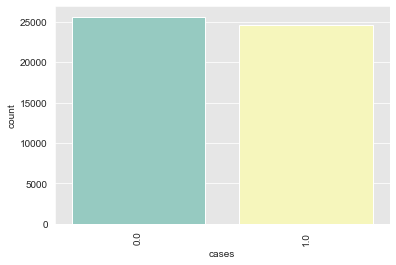

In [128]:
sns.countplot(y_train, palette='Set3')
plt.xticks(rotation=90)

# Government Regulation Features

The Governments' responses to COVID19 are the measures implemented by governments worldwide in response to the Coronavirus pandemic. There are two types of measures: public health measures and economic measures. .  
The variables are :

- cases: binary variable equal to 1 if there were cases of SARS-CoV-2 and 0 otherwise;
- school: binary variable equal to 1 if schools were closed and 0 otherwise;
- domestic: binary variable equal to 1 if there was a domestic lockdown and 0 otherwise;
- travel: binary variable equal to 1 if travel restrictions were implemented and 0 otherwise;
- travel_dom: binary variable equal to 1 if travel restrictions within the country  (e.g. inter-region travels) were implemented and 0 otherwise;
- curf: binary variable equal to 1 if a curfew was implemented and 0 otherwise;
- mass: binary variable equal to 1 if bans on mass gatherings were implemented and 0 otherwise;
- elect: binary variable equal to 1 if some elections were postponed and 0 otherwise;
- sport: binary variable equal to 1 if bans on sporting and large events were implemented and 0 otherwise;
- rest: binary variable equal to 1 if restaurants were closed and 0 otherwise;
- testing: binary variable equal to 1 if there was a public testing policy and 0 otherwise;
- surveillance: binary variable equal to 1 if mobile app or bracelet surveillance was implemented and 0 otherwise;
- masks binary variable equal to 1 if the obligationsto wear masks in public spaces was implemented and 0 otherwise;
- state: binary variable equal to 1 if the state of emergency is declared and 0 otherwise;
- cash: binary variable equal to 1 if cash transfers are implemented and 0 otherwise;
- wage: binary variable equal to 1 if wage support is implemented and 0 otherwise;
- credit: binary variable equal to 1 if credit schemes are implemented and 0 otherwise;
- taxc: binary variable equal to 1 if tax credits are implemented and 0 otherwise;
- taxd: binary variable equal to 1 if tax delays are implemented and 0 otherwise;
- export: binary variable equal to 1 if supports to importers or exporters are implemented and 0 otherwise;
- rate: binary variable equal to 1 if the Central Bank lowered the interest rates and 0 otherwise;

# Feature Engineering

Makes the dependent variable y be the cases and the independent variables X be the government regulations.  Then, splits data, 80/20, into a train test split.  

In [129]:
y=df1[('cases')]
X=df1.drop(['cases'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Binary logistic regression assumsions are a binary dependent variable, independent observations, linear continuous variables, no strongly influential outliers, independent variables with no multicollinearity, and and a large sample size.  The dependent variable is zero or one, the observations are not repeated measurements made on each experimental unit or matched -- when pairs of data are matched based on similar features, there are no continuous variables, the data are zeros and ones so there are no outliers, and the data has 50160 rows. 

Check for muticollinearity.  

<AxesSubplot:>

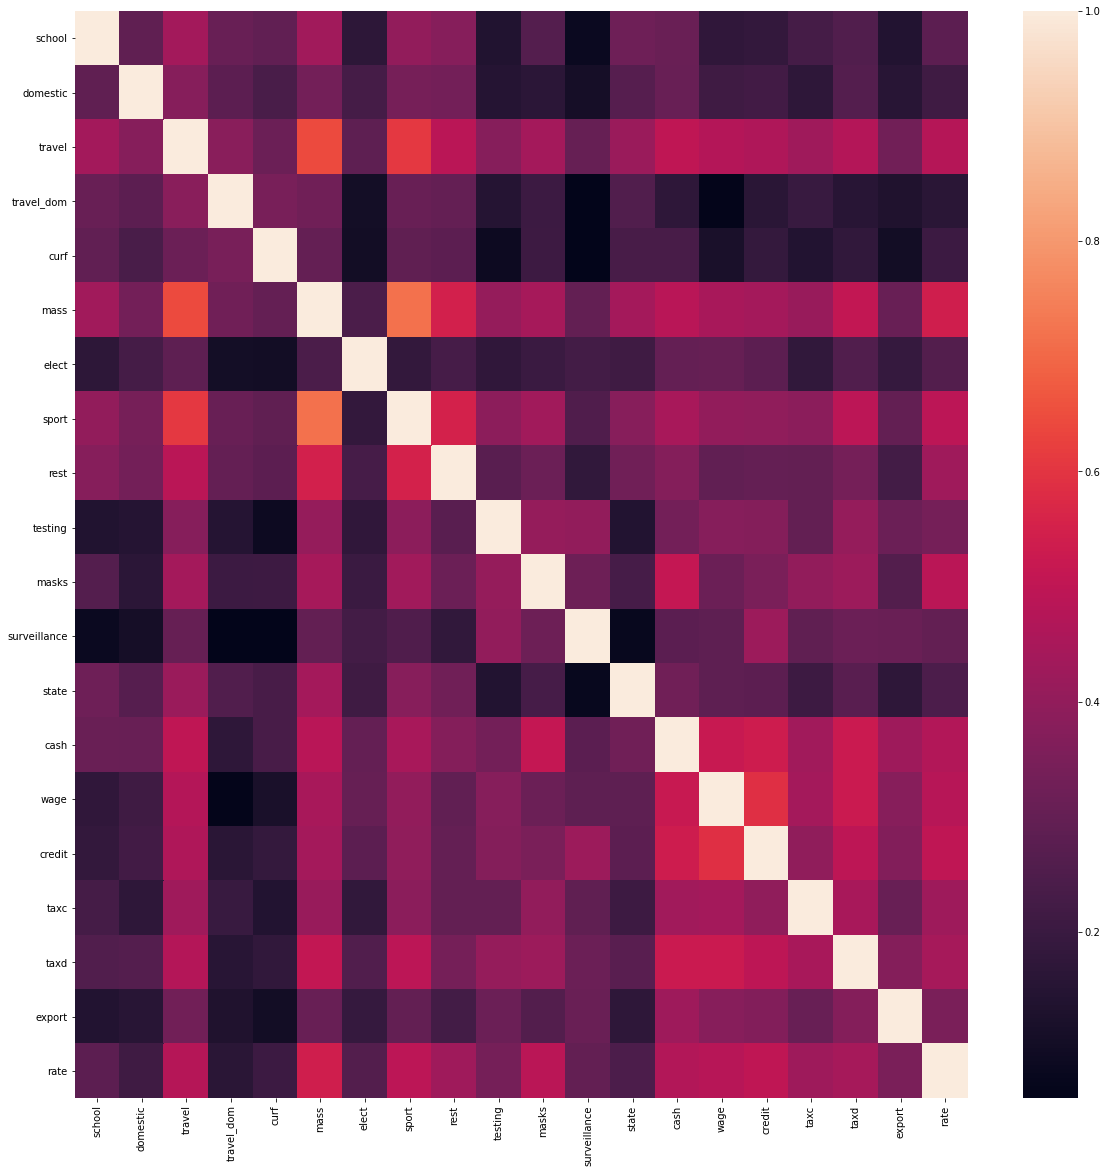

In [25]:
x_corr=X_train.corr(method='pearson')
plt.figure(figsize=[20, 20])
sns.heatmap(x_corr)

In [26]:
correlation=[]
for columnName1, columnData1 in X_train.iteritems():
    for columnName2, columnData2 in X_train.iteritems():
        if abs(columnData1.corr(columnData2)) > .7:
            correlation.append((columnName1, columnName2, abs(columnData1.corr(columnData2))))
correlation

[('school', 'school', 1.0),
 ('domestic', 'domestic', 0.9999999999999999),
 ('travel', 'travel', 1.0),
 ('travel_dom', 'travel_dom', 0.9999999999999999),
 ('curf', 'curf', 1.0),
 ('mass', 'mass', 0.9999999999999999),
 ('mass', 'sport', 0.7186910509080194),
 ('elect', 'elect', 1.0),
 ('sport', 'mass', 0.7186910509080194),
 ('sport', 'sport', 1.0),
 ('rest', 'rest', 1.0),
 ('testing', 'testing', 1.0),
 ('masks', 'masks', 1.0),
 ('surveillance', 'surveillance', 1.0),
 ('state', 'state', 1.0),
 ('cash', 'cash', 1.0),
 ('wage', 'wage', 1.0),
 ('credit', 'credit', 1.0),
 ('taxc', 'taxc', 1.0),
 ('taxd', 'taxd', 1.0),
 ('export', 'export', 1.0),
 ('rate', 'rate', 1.0)]

Remove multicollinear feature from X.

In [ ]:
X_train=X_train.drop('sport', axis=1)
X_test=X_test.drop('sport', axis=1)

# Logistic Regression Model

The Logistic function, logit(P), starts with setting the log odds equal to the parameters.  Exponentiate both sides of the equation and cross multiply 1-P to get the logistic function. 

$$ ln(\frac{P}{1-P})=α+βx $$

$$ \frac{P}{1-P}=e^{α+βx} $$

$$ P=\frac{e^{α+βx}}{1+e^{α+βx}} $$

The probability of class 1 is the logistic function and of class 0 is one minus the logistic function.

$$ P(Class=1|X=x)=\frac{e^{α+βx}}{1+e^{α+βx}} $$

$$ P(Class=0|X=x)=1-\frac{e^{α+βx}}{1+e^{α+βx}} $$

Take the inverse of P to get the desired sigmoid function.

$$ σ(x)=P^{-1}=\frac{1}{1+e^{-(α+βx)}} $$

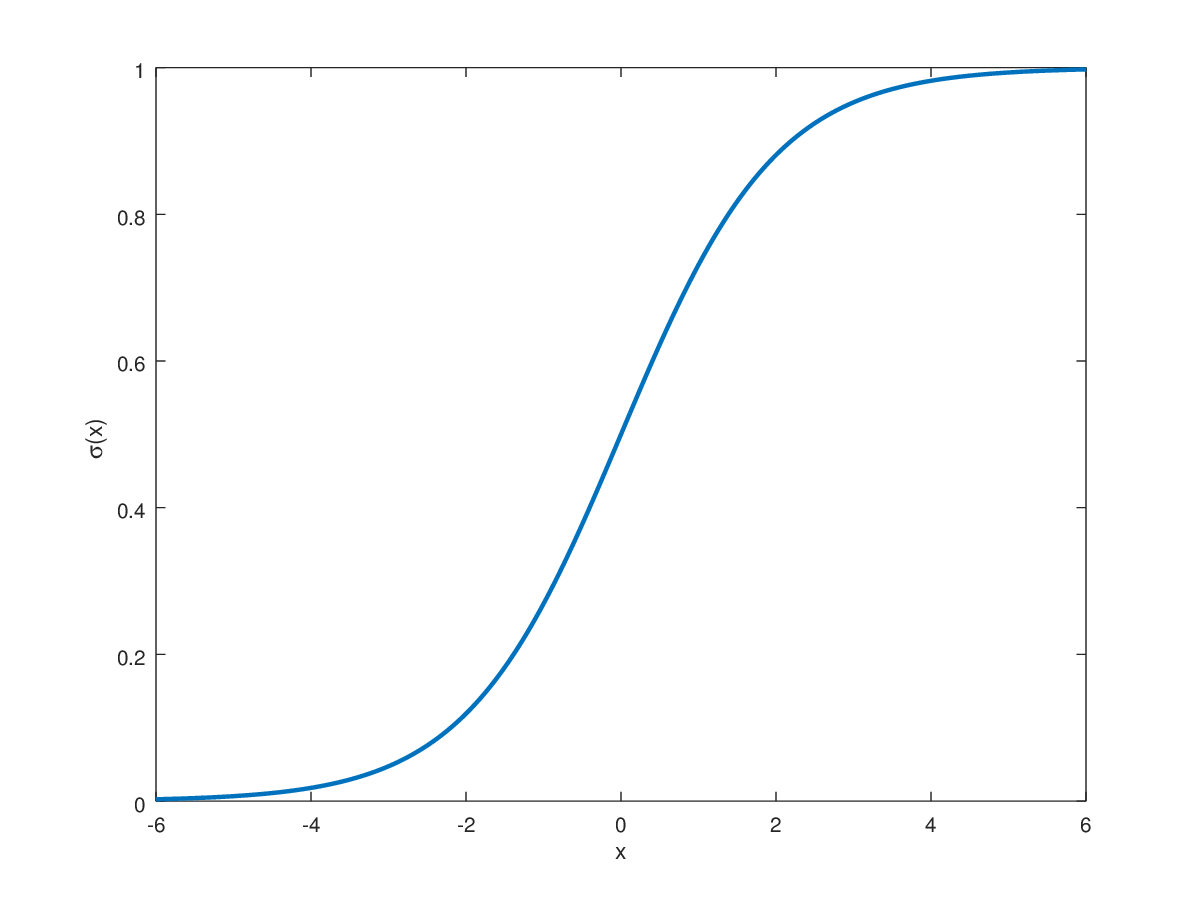

In [27]:
Image(filename='sigmoid_function.png') 

The predicted labels are binary so each label is a Bernoulli random variable from a Bernoulli probability mass function.

$$ P(x;p)= \left\{\begin{array}{}
p & : x = 1\\
1-p & : x = 0
\end{array}
\right.$$

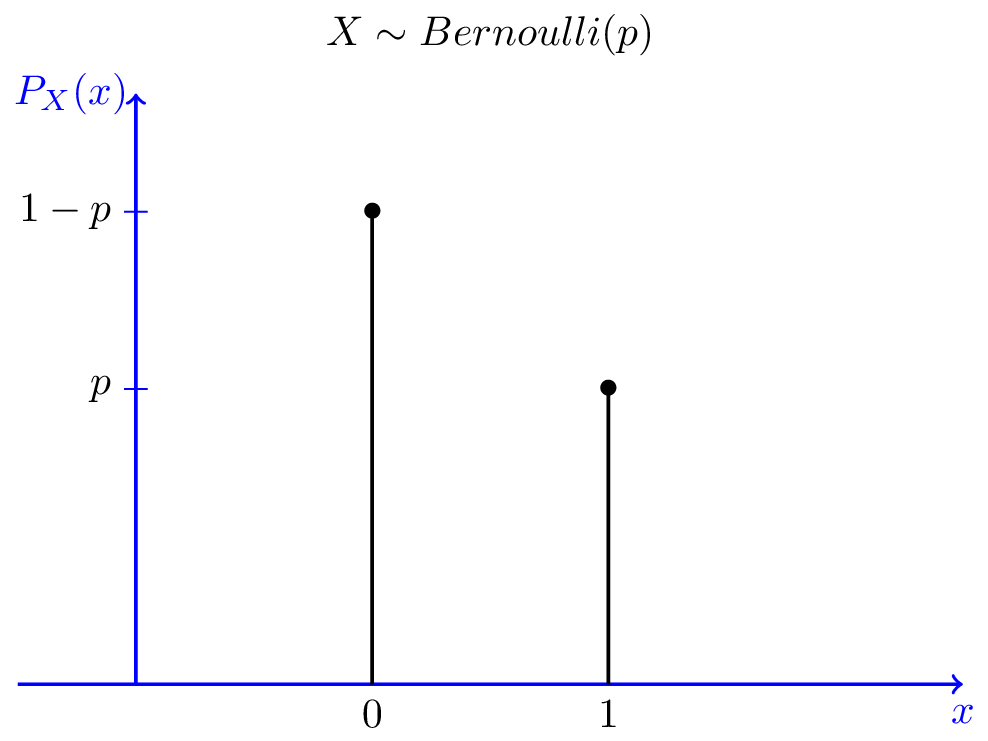

In [28]:
Image(filename='bernoulli(p) color.png')

MLE, maximum likelihood estimation, finds the parameters, θ, that maximize the log likelihood probability, a model comparitive metric, that a value belongs to a class.  

$$ MLE=∏_{i}^{N}P(Y=y_{i}|X=x_{i}) $$

$$ argmax LL(θ)=∑_{i}^{N}y_{i}*log(σ(θ^{T}*𝑥_{i}))+(1-y_{i})*log(1-σ(θ^{T}*𝑥_{i})) $$

Solve for θ that maximizes the the log likelihood by solving for the partial derivative of the log likelihood with respect to θ and gradiently accend toward the maximum of the LL function.

$$ ∇\frac{∂LL(θ)}{∂θ_{j}}=∑_{i}^{N}[y_{i}-θ^{T}*𝑥_{i}]x_{ij} $$

Iteratively accend toward maximum LL with an η stepsize.

$$  θ^{new}_{j}=θ^{previous}_{j}+η*∇\frac{∂LL(θ^{previous})}{∂θ^{previous}_{j}} $$

The McFadden R squared, a model comparitive metric, is 1 minus the log likelihood of the full model, which is like the sum of squared residuals, devided by the log likelihood of the intercept model, which is like the total sum of squares.

$$ R^{2}_{McF}=1-\frac{lnL(M_{full})}{lnL(M_{int})} $$

Conduct logistic regression model from statsmodels for regression results.

In [29]:
log_reg = sm.Logit(y_train, X_train).fit() 
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.572517
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  cases   No. Observations:                50160
Model:                          Logit   Df Residuals:                    50140
Method:                           MLE   Df Model:                           19
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                  0.1738
Time:                        17:29:15   Log-Likelihood:                -28717.
converged:                       True   LL-Null:                       -34758.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
school          -0.2966      0.025    -11.709      0.000      -0.346      -0.247
domestic         0.5533      0.036     15.454      0.000       0.483       0.623
travel          -0.5380      0.032    -16.877      0.000      -0.601      -0.476
travel_dom       0.1094      0.033      3.285      0.001       0.044       0.175
curf             0.1600      0.032      4.994      0.000       0.097       0.223
mass             0.3283      0.035      9.252      0.000       0.259       0.398
elect            0.5081      0.033     15.629      0.000       0.444       0.572
sport            0.1457      0.034      4.280      0.000       0.079       0.212
rest             0.4066      0.031     13.201      0.000       0.346       0.467
testing         -0.0520      0.030     -1.718      0.086      -0.111       0.007
masks            0.7603      0.030     24.965      0.000       0.701       0.820
surveillance     0.3923      0.041      9.499      0.000       0.311       0.473
state           -0.1509      0.028     -5.367      0.000      -0.206      -0.096
cash             0.7565      0.033     23.247      0.000       0.693       0.820
wage            -0.0775      0.032     -2.410      0.016      -0.141      -0.014
credit           0.0900      0.032      2.796      0.005       0.027       0.153
taxc            -0.3755      0.029    -12.792      0.000      -0.433      -0.318
taxd             0.4425      0.031     14.310      0.000       0.382       0.503
export           0.1836      0.036      5.131      0.000       0.113       0.254
rate            -0.0836      0.030     -2.809      0.005      -0.142      -0.025
================================================================================
"""

Remove statistically insignificant feature.

In [31]:
X_train=X_train.drop('testing', axis=1)

In [32]:
log_reg = sm.Logit(y_train, X_train)
model=log_reg.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.572547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  cases   No. Observations:                50160
Model:                          Logit   Df Residuals:                    50141
Method:                           MLE   Df Model:                           18
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                  0.1737
Time:                        17:30:49   Log-Likelihood:                -28719.
converged:                       True   LL-Null:                       -34758.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
school          -0.2940      0.025    -11.625      0.000      -0.344      -0.244
domestic         0.5552      0.036     15.518      0.000       0.485       0.625
travel          -0.5417      0.032    -17.017      0.000      -0.604      -0.479
travel_dom       0.1073      0.033      3.226      0.001       0.042       0.173
curf             0.1619      0.032      5.057      0.000       0.099       0.225
mass             0.3236      0.035      9.146      0.000       0.254       0.393
elect            0.5072      0.032     15.606      0.000       0.443       0.571
sport            0.1403      0.034      4.137      0.000       0.074       0.207
rest             0.4030      0.031     13.109      0.000       0.343       0.463
masks            0.7515      0.030     25.031      0.000       0.693       0.810
surveillance     0.3802      0.041      9.341      0.000       0.300       0.460
state           -0.1474      0.028     -5.255      0.000      -0.202      -0.092
cash             0.7581      0.033     23.305      0.000       0.694       0.822
wage            -0.0819      0.032     -2.555      0.011      -0.145      -0.019
credit           0.0879      0.032      2.733      0.006       0.025       0.151
taxc            -0.3738      0.029    -12.740      0.000      -0.431      -0.316
taxd             0.4360      0.031     14.210      0.000       0.376       0.496
export           0.1784      0.036      5.006      0.000       0.109       0.248
rate            -0.0819      0.030     -2.756      0.006      -0.140      -0.024
================================================================================
"""

The presence of the independent variables increases or decreases the log odds of the presence of the dependent variable based on the sign of the parameter coefficients.  The government regulations of school closures, travel restrictions, state of emergency declarations, wage support, tax credits, and interest rate lowering decreased the log odds of the presence of virus cases. 

Goodness-of-fit tests determine whether the predicted probabilities deviate from the observed probabilities. Deviance is the difference of likelihoods between the fitted model and the residuals.  0 predicted residuals are negative and 1 predicted residuals are positive.  μ̂i are the fitted values and yi are the observed values.

$$ Deviance Residuals=∑_{i}^{N}\sqrt{2[yi*log(y_{i}/μ̂_{i})+(n_{i}−y_{i})*log(n_{i}−y_{i}/n_{i}-μ̂_{i})]} $$

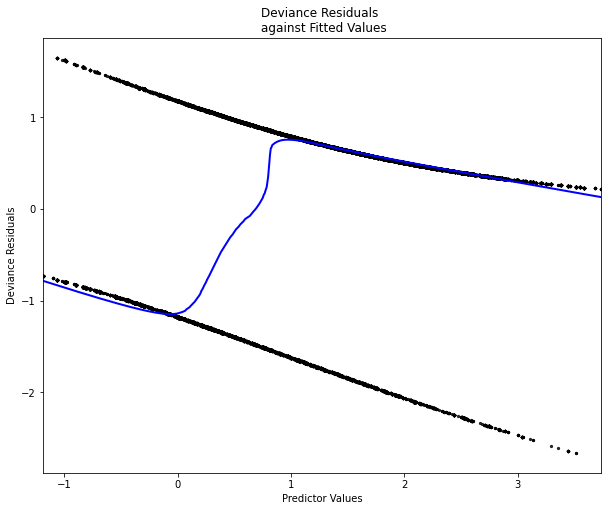

In [33]:
fig, ax = plt.subplots(1, figsize=(10, 8))
sns.regplot(model.fittedvalues, model.resid_dev, ax= ax,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)
plt.title("Deviance Residuals \n against Fitted Values")
plt.xlabel("Predictor Values")
plt.ylabel("Deviance Residuals")
plt.show()

$$ Pearson Residuals= ∑_{i}^{N}\frac{y_{i}−μ̂_{i}}{\sqrt{μ̂_{i}(n_{i}−μ̂_{i})/n_{i}}} $$

Text(0, 0.5, 'Pearson Residuals')

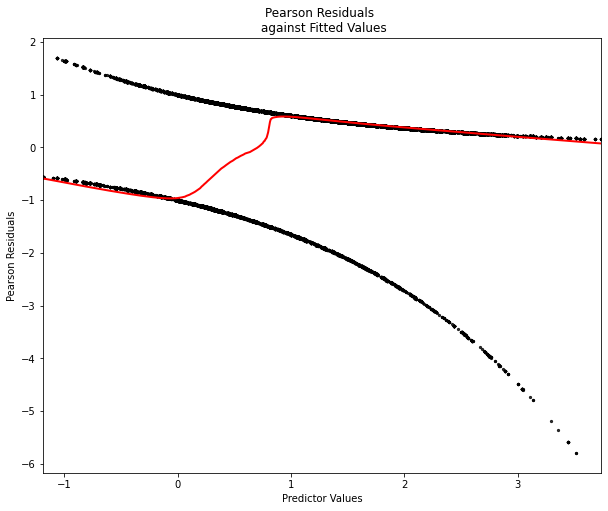

In [34]:
fig, ax = plt.subplots(1, figsize=(10, 8))
sns.regplot(model.fittedvalues, model.resid_pearson, ax= ax,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"r", "alpha":1, "lw":2}, lowess=True)

plt.title("Pearson Residuals \n against Fitted Values")
plt.xlabel("Predictor Values")
plt.ylabel("Pearson Residuals")

Pearson’s chi-squared test is a goodness-of-fit test that determines whether categorical observed values, O, are consistent with their coresponding expected values, E.

$$ χ2=∑_{i}^{N}\frac{(O_{i}-E_{i})^2}{E_{i}} $$

$$ E(x)=∑_{i}^{N}x_{i}*p(x_{i}) $$

In [43]:
stat, p = chisquare(model.resid_pearson)#Null Hypothesis: no significant difference between the observed and the expected values
print('Stat:', stat, 'P-value:', p)
alpha=.05
if p>alpha:
    print('Don\'t reject null of no significant difference between the observed and the expected values.')
else:
    print('Reject null of no significant difference between the observed and the expected values.')

Stat: -145098.9073862549 P-value: 1.0
Don't reject null of no significant difference between the observed and the expected values.


Conduct logistic regression model from sklearn for classification results.

In [44]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_hat_train = logistic_regression.predict(X_train)

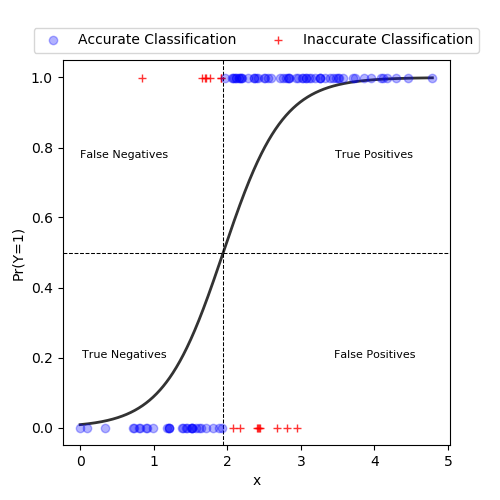

In [45]:
Image(filename='lr.png')

For the train set, the model has 20765 true positives, 20242 true negatives, 4834 false positives, and 4319 false negatives.


Confusion Matrix
----------------
       0      1
0  20765   4834
1   4319  20242


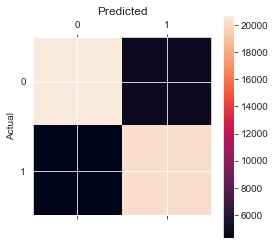

In [55]:
con_mat(y_train, y_hat_train)

$$ precision = \frac{TP}{TP+FP} $$

$$ recall=\frac{TP}{TP+FN} $$

$$ f1=\frac{2*precision*recall}{precision+recall} $$

$$ accuracy=\frac{TP+TN}{TP+FN+TN+FP} $$

$$ specificity=\frac{TN}{TN+FP} $$

Precision Score: 0.8072260328601053
Recall Score: 0.8241521110703962
F1 Score: 0.8156012651852449
Accuracy Score: 0.817523923444976
Specificity Score: 0.8278185297400733


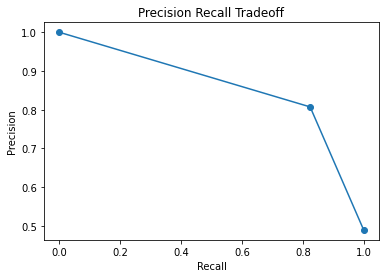

In [49]:
Metrics(y_train, y_hat_train)

$$ True Positive Rate=\frac{TP}{TP+FN} $$

$$ False Positive Rate=\frac{FP}{FP+TN} $$

$$ Receiver Operating Characteristic=\frac{TPR}{FPR} $$

$$ Area Under Curve=∫_{a}^{b}TPR(FPR^{-1}(x))dx $$

AUC: 0.8176583048418117


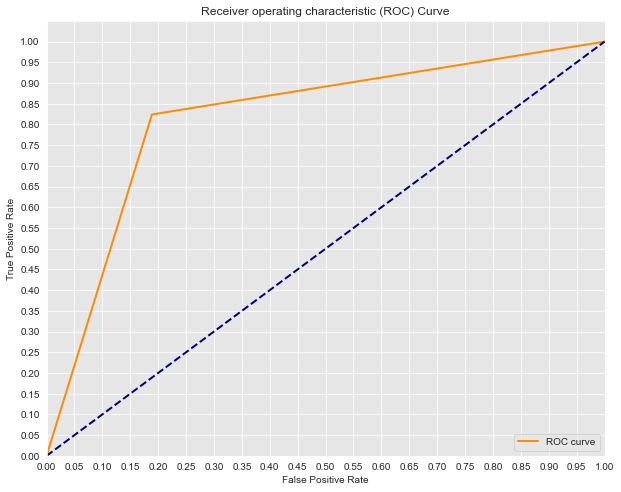

In [60]:
roc(y_train, y_hat_train)

The log loss, a cost function, is the cross entropy between the distribution of the true labels and the predictions.  Entropy measures unpredictability and cross entropy incorporates the entropy of the predicted distribution with of the true distribution.  The log loss multiplies -1 by the log likelihood to identify that lower scores are better, devides the result by the sample size, and reults in the mean loss. As the loss approaches 0, the probability of correct classification increases.

$$ Negative Log Loss=-\frac{1}{N}∑_{i}^{N}y_{i}*log(σ(θ^{T}*𝑥_{i})+(1-y_{i})*log(1-σ(θ^{T}*𝑥_{i})) $$

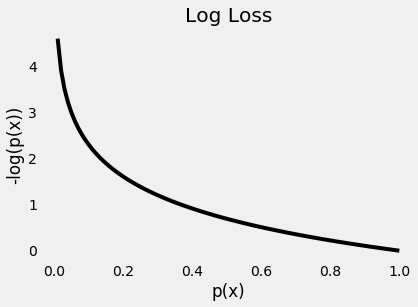

In [51]:
Image(filename='log_loss.png')

In [52]:
cv_score = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='neg_log_loss')
mean_cv_score = np.mean(cv_score)
print('Mean Cross Validation of Cost Function')
print(f"Negative Log Loss Score: {mean_cv_score}")

Mean Cross Validation of Cost Function
Negative Log Loss Score: -0.42917685692963775


Test model on test set.

In [53]:
logistic_regression.fit(X_test, y_test)

y_hat_test = logistic_regression.predict(X_test)

For the test set, the model has 5233 true positives, 5043 true negatives, 1201 false positives, and 1063 false negatives.


Confusion Matrix
----------------
      0     1
0  5233  1201
1  1063  5043


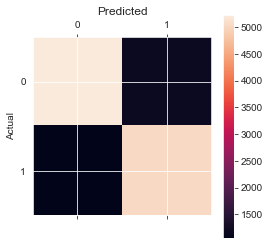

In [62]:
con_mat(y_test, y_hat_test)

Precision Score: 0.8076553491351698
Recall Score: 0.8259089420242385
F1 Score: 0.8166801619433198
Accuracy Score: 0.8194577352472089
Specificity Score: 0.8311626429479034


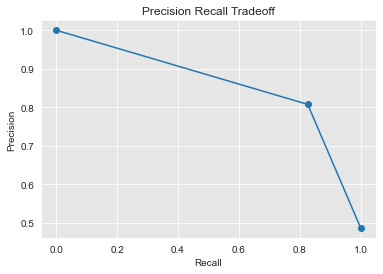

In [56]:
Metrics(y_test, y_hat_test)

AUC: 0.8196221738408417


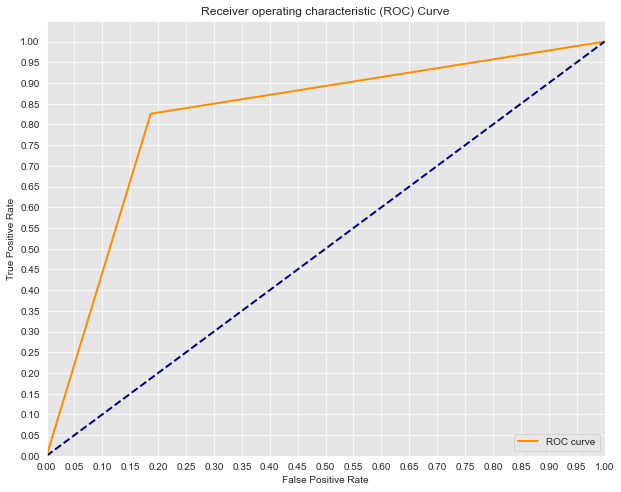

In [61]:
roc(y_test,y_hat_test)

# Conclusion

The logit model suggests that the government regulations of school closures, travel restrictions, state of emergency declarations, wage support, tax credits, and interest rate lowering decreased the log odds of the presence of virus cases.  Government regulations such as disallowing public gatherings and mandating wearing masks did not decrease the log odds of the presence of virus cases.  The virus travels in sneezed or coughed droplets of mucus or saliva, is airborne for a few moments, and then lands on a surface.  Instead of wearing masks and preventing gatherings, carrying a handkerchiefs in which people could sneeze or cough and sanitizing areas were people gather would be sufficient in preventing the spread of SARS-CoV-2.